In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Import nltk and others (stopwords) for cleaning up text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
import string

nltk.download('stopwords')
ps = PorterStemmer()
pattern = re.compile('[^a-zA-Z]')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/IMLP/sentiment-analysis

/content/gdrive/My Drive/IMLP/sentiment-analysis


In [ ]:
text_train = pd.read_csv('train.csv', encoding='latin-1')
text_test = pd.read_csv('test.csv', encoding='latin-1')
text_train.head()

print(len(text_train))
print(len(text_test))
print(len(text_train) + len(text_test))

27481
4815
32296


In [ ]:
text_train['text'] = [str(text) for text in text_train['text']]
text_test['text'] = [str(text) for text in text_test['text']]

text_train = text_train[text_train['sentiment'] != 'neutral']
text_test = text_test[text_test['sentiment'] != 'neutral']

print(len(text_train))
print(len(text_test))
print(len(text_train) + len(text_test))

16363
3385
19748


In [ ]:
X_train = [str(doc) for doc in text_train['text']]
X_test = [str(doc) for doc in text_test['text']]

y_train = [str(doc) for doc in text_train['sentiment']]
y_test = [str(doc) for doc in text_test['sentiment']]

In [ ]:
new_y_train = []

for element in y_train:
  if element == 'positive':
    new_y_train.append(1)
  elif element == 'negative':
    new_y_train.append(0)

new_y_test = []

for element in y_test:
  if element == 'positive':
    new_y_test.append(1)
  elif element == 'negative':
    new_y_test.append(0)

In [ ]:
y_train = new_y_train
y_test = new_y_test

In [ ]:
print(y_train[:5])

[0, 0, 0, 0, 1]


In [ ]:
print(y_test[:5])

[1, 0, 1, 1, 1]


In [ ]:
print(X_train)

[' Sooo SAD I will miss you here in San Diego!!!', 'my boss is bullying me...', ' what interview! leave me alone', ' Sons of ****, why couldn`t they put them on the releases we already bought', '2am feedings for the baby are fun when he is all smiles and coos', ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)', 'I really really like the song Love Story by Taylor Swift', 'My Sharpie is running DANGERously low on ink', 'i want to go to music tonight but i lost my voice.', 'Uh oh, I am sunburned', ' S`ok, trying to plot alternatives as we speak *sigh*', 'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw', 'is back home now      gonna miss every one', 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet', 'the free fillin` app on my ipod is fun, im addicted', '  I`m sorry.', 'On the way to Malaysia.

In [ ]:
new_X_train = []
new_X_test = []

for doc in X_train:
    filtered_words = [ps.stem(word) for word in pattern.sub(' ', doc).lower().split() if word not in stopwords.words('english')]
    new_X_train.extend([filtered_words])

for doc in X_test:
    filtered_words = [ps.stem(word) for word in pattern.sub(' ', doc).lower().split() if word not in stopwords.words('english')]
    new_X_test.extend([filtered_words])


X_train = new_X_train
X_test = new_X_test

In [ ]:
print(X_train)

[['sooo', 'sad', 'miss', 'san', 'diego'], ['boss', 'bulli'], ['interview', 'leav', 'alon'], ['son', 'put', 'releas', 'alreadi', 'bought'], ['feed', 'babi', 'fun', 'smile', 'coo'], ['journey', 'wow', 'u', 'becam', 'cooler', 'hehe', 'possibl'], ['realli', 'realli', 'like', 'song', 'love', 'stori', 'taylor', 'swift'], ['sharpi', 'run', 'danger', 'low', 'ink'], ['want', 'go', 'music', 'tonight', 'lost', 'voic'], ['uh', 'oh', 'sunburn'], ['ok', 'tri', 'plot', 'altern', 'speak', 'sigh'], ['sick', 'past', 'day', 'thu', 'hair', 'look', 'wierd', 'didnt', 'hat', 'would', 'look', 'http', 'tinyurl', 'com', 'mnf', 'kw'], ['back', 'home', 'gonna', 'miss', 'everi', 'one'], ['play', 'ghost', 'onlin', 'realli', 'interest', 'new', 'updat', 'kirin', 'pet', 'metamorph', 'third', 'job', 'wait', 'dragon', 'pet'], ['free', 'fillin', 'app', 'ipod', 'fun', 'im', 'addict'], ['sorri'], ['way', 'malaysia', 'internet', 'access', 'twit'], ['juss', 'came', 'backk', 'berkeleyi', 'omg', 'madd', 'fun', 'havent', 'minut

In [ ]:
X_train = [' '.join(doc) for doc in X_train]
X_test = [' '.join(doc) for doc in X_test]

print(X_train)

['sooo sad miss san diego', 'boss bulli', 'interview leav alon', 'son put releas alreadi bought', 'feed babi fun smile coo', 'journey wow u becam cooler hehe possibl', 'realli realli like song love stori taylor swift', 'sharpi run danger low ink', 'want go music tonight lost voic', 'uh oh sunburn', 'ok tri plot altern speak sigh', 'sick past day thu hair look wierd didnt hat would look http tinyurl com mnf kw', 'back home gonna miss everi one', 'play ghost onlin realli interest new updat kirin pet metamorph third job wait dragon pet', 'free fillin app ipod fun im addict', 'sorri', 'way malaysia internet access twit', 'juss came backk berkeleyi omg madd fun havent minut whassqoodd', 'went sleep power cut noida power back work', 'go home seen new twitter design quit heavenli', 'hope unni make audit fight dahy unni', 'consol got bmi test hahaha say obes well much unhappi minut', 'funni cute kid', 'born rais nyc live texa past year still miss ny', 'soooooo sleeeeepi last day school today s

In [ ]:
# y_train = np.argmax(y_train, axis=1)
# y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(TfidfVectorizer(),
                     LogisticRegression(solver='lbfgs'))

param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [ ]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

Best parameters: {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.87


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_tfidfvectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.204378,0.023554,0.037874,0.005304,0.01,"(1, 1)","{'logisticregression__C': 0.01, 'tfidfvectoriz...",0.763520,0.763825,0.757409,0.771088,0.757029,0.762574,0.005145,10
1,0.533610,0.015043,0.065922,0.008879,0.01,"(1, 2)","{'logisticregression__C': 0.01, 'tfidfvectoriz...",0.644668,0.643446,0.643752,0.650367,0.641504,0.644747,0.002993,11
2,0.887481,0.030967,0.079847,0.009821,0.01,"(1, 3)","{'logisticregression__C': 0.01, 'tfidfvectoriz...",0.604950,0.602811,0.604339,0.604523,0.603912,0.604107,0.000729,12
3,0.185565,0.029578,0.038687,0.008059,0.10,"(1, 1)","{'logisticregression__C': 0.1, 'tfidfvectorize...",0.845096,0.844791,0.856401,0.855746,0.858191,0.852045,0.005854,7
4,0.647769,0.085657,0.060030,0.004828,0.10,"(1, 2)","{'logisticregression__C': 0.1, 'tfidfvectorize...",0.839291,0.843263,0.846318,0.854523,0.852384,0.847156,0.005645,8


In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import mglearn

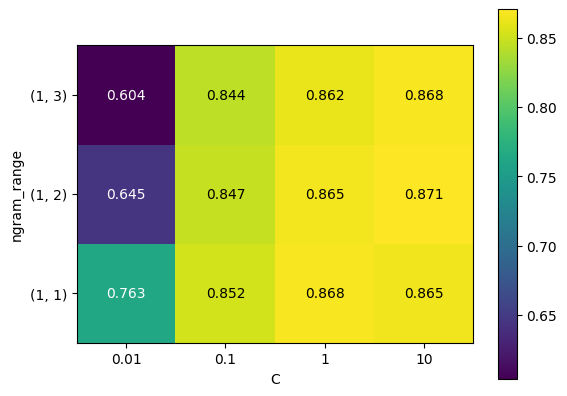

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

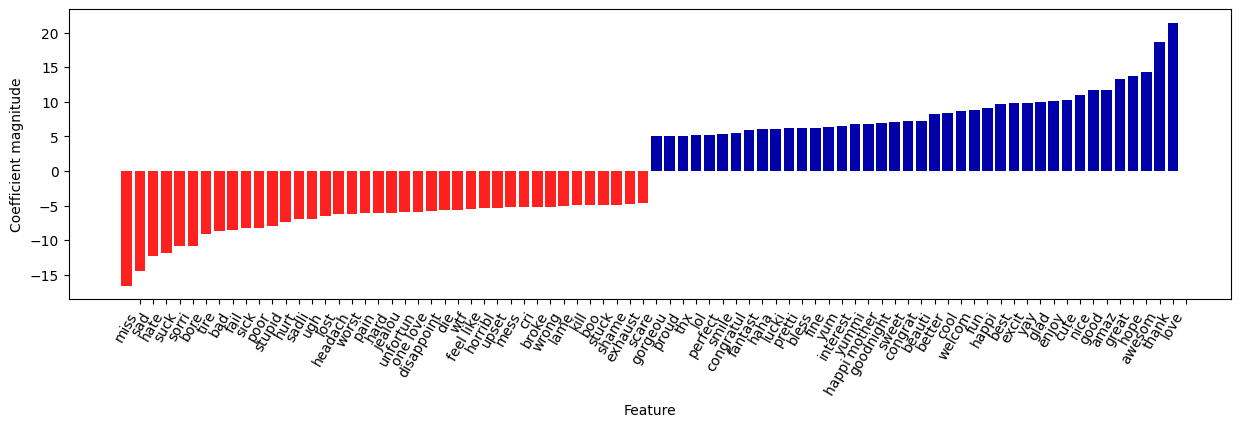

In [ ]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

In [ ]:
def predict(text):
  filtered_words = [ps.stem(word) for word in pattern.sub(' ', text).lower().split()]
  filtered_words = ' '.join(filtered_words)
  vect_words = vect.transform([filtered_words])
  return grid.best_estimator_.named_steps['logisticregression'].predict(vect_words)

In [ ]:
#@title Testing Demo { run: "auto", vertical-output: true, display-mode: "both" }
demo_text = "I love this book" #@param {type:"string"}

if predict(demo_text) == 1:
  print("Positive")
else:
  print("Negative")

Positive


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(vect.transform(X_train))

print(lda.components_.shape)

(10, 93543)


In [ ]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names_out())

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
miss          good          feel          love          go            
like          go            go            go            sad           
love          thank         like          work          thank         
thank         morn          good          wish          get           
day           good morn     miss          good          good          
go            love          get           get           love          
think         get           welcom        day           day           
get           miss          day           want          today         
good          like          hope          miss          work          
sound         day           work          thank         hope          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
go  